# Определение факторов, влияющие на популярность игр

Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы. Нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании для продвижения.

# План исследования

- [Анализ данных](#анализ)
- [Исследовательский анализ данных](#eda)
- [Портрет Регионов](#портрет)
- [Проверка гипотез](#гипотезы)
- [Выводы](#вывод)

# Анализ Данных <a id='анализ'></a>

Первым делом собираюсь открыть датасэт, изучить его структуру, наличие пропусков, форматы данных. Далее собираюсь привести данные к единым форматам, изменить заголовки столбцов для облегчения доступа к информации. Заполнить пропуски при наличии таковых.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from math import factorial
import numpy as np
from scipy import stats as st
import math as mt

In [2]:
data = pd.read_csv('/datasets/games.csv')
data

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


В датасете 11 столбцов с различными данными, которые условно можно разделить на название игры, год выпуска, жанр, продажи по регионам, оценки пользователей и критиков, а также рейтинг ESRB. Продажи представлены в млн копий, оценки пользователей по 10-бальной шкале, критиков по 100-бальной.

Необходимо привести названия столбцов к нижнему регистру. Данные в столбцах с продажами, оценкой пользователей и критиков можно оставить в формате float, тк подобного рода данные даются в формате дробных чисел. Целочисленный формат (отброс добной части или округление) может исказить общую картину. Значения tbd (to be defined) меняем на заглушку nan. Заполнение пропусков в любом столбце чревато искажением общей картины исследования, поэтому заполнять пропуски не стану. В отдельные столбцы посчитаем суммарные продажи по регионам

In [4]:
data.columns = data.columns.str.lower()
data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [5]:
data.loc[data['user_score'] == 'tbd', 'user_score'] = float('nan')
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', '8.8', '6.9', '9.4', '6.8', '6.1',
       '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6', '3.7',
       '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9', '3.1',
       '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3', '2.7',
       '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0', '1.6',
       '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2', '2.3',
       '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'], dtype=object)

In [6]:
data['sales_total'] = data['eu_sales'] + data['na_sales'] + data['jp_sales'] + data['other_sales']
data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales_total
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01


In [7]:
data = data.dropna(subset=['year_of_release']).reset_index(drop=True)
data['year_of_release'] = pd.to_datetime(data['year_of_release'], format='%Y')
data['year_of_release'] = pd.DatetimeIndex(data['year_of_release']).year
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16446 entries, 0 to 16445
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16446 non-null  object 
 2   year_of_release  16446 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16446 non-null  float64
 5   eu_sales         16446 non-null  float64
 6   jp_sales         16446 non-null  float64
 7   other_sales      16446 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   object 
 10  rating           9768 non-null   object 
 11  sales_total      16446 non-null  float64
dtypes: float64(6), int64(1), object(5)
memory usage: 1.5+ MB


In [8]:
data['rating'] = data['rating'].fillna('unknown')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16446 entries, 0 to 16445
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16446 non-null  object 
 2   year_of_release  16446 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16446 non-null  float64
 5   eu_sales         16446 non-null  float64
 6   jp_sales         16446 non-null  float64
 7   other_sales      16446 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   object 
 10  rating           16446 non-null  object 
 11  sales_total      16446 non-null  float64
dtypes: float64(6), int64(1), object(5)
memory usage: 1.5+ MB


In [9]:
data['user_score'] = data['user_score'].astype('float')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16446 entries, 0 to 16445
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16446 non-null  object 
 2   year_of_release  16446 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16446 non-null  float64
 5   eu_sales         16446 non-null  float64
 6   jp_sales         16446 non-null  float64
 7   other_sales      16446 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16446 non-null  object 
 11  sales_total      16446 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.5+ MB


В общем и целом подготовка данных завершена

# Исследовательский анализ данных <a id='eda'></a>

Сколько игр выпускалось в разные годы

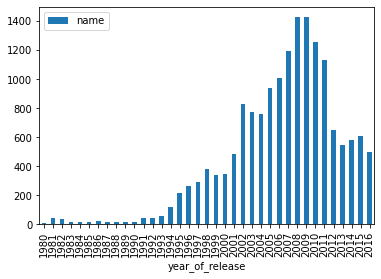

In [10]:
games_years = data.pivot_table(index='year_of_release', values='name', aggfunc='count')
games_years.plot(y='name', kind='bar')
plt.show()

Данные за все периоды, нас понятное, дело не будут интересовать, поскольку менялись технологии производства игр, они все более усложнялись как в техническом, так и сюжетном плане. Более того, все больше совершенствуется железо для новых игр, чтобы они запускались и шли без перебоев. Опираясь на график, я бы взял период с с 2012 по 2016 годы, то есть последние 5 лет. В этот период ежегодно выпускались игры без больших перепадов по их количеству.

Продажи по платформам

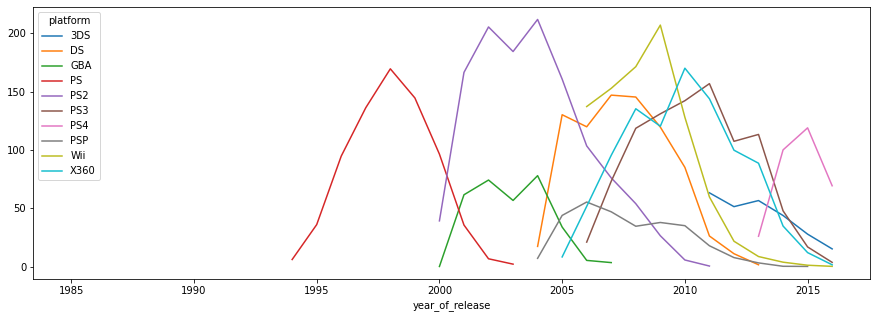

In [11]:
top_10 = data.groupby('platform').agg({'sales_total' : 'sum'}).sort_values(by='sales_total').tail(10).index
data.query('platform in @top_10').pivot_table(index = 'year_of_release', columns = 'platform',
                                             values = 'sales_total', aggfunc='sum').plot(figsize = (15, 5))
plt.show()

По графику видно, что поддержка платформ идет длится примерно десятилетие, после чего поддержка зааканчивается, на них не пишутся игры. Исключением является PC (personal computer). По графику видно, что поддержка платформы шла и будет идти, на нее всегда пишутся игры.

Попробую точнее определить актуальный период. По скольку нас интересуют возможные платформы, на которых будут выпускаться игры, а также данные будут играть решающую роль при определении стратегии на 2017 год, то будем пользоваться данными из топ-10 платформ по продажам и выберем те платформы, где суммарные продажи превышали 1 млн копий

In [12]:
actual_period = data.groupby(['platform', 'year_of_release']).agg({'sales_total' : 'sum'}).query('platform in @top_10 and sales_total > 1')
actual_period = actual_period.reset_index().groupby('platform').agg({'year_of_release' : 'count'})
actual_period.mean()

year_of_release    9.1
dtype: float64

Значение подтверждает высказанное выше по графику гипотезу, что платформа живет примерно десятилетие. Для дальнейшего анализа я бы все равно взял период с 2012 по 2016 год, аргументируя это тем, что до 2012 года выпуск игр был чуть ли не двое выше. Падение в 2012 году может просто вызвать перекос в выводах.

In [13]:
data_selection = data.query('2012 <= year_of_release <=2016')
data_selection.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2886 entries, 16 to 16445
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             2886 non-null   object 
 1   platform         2886 non-null   object 
 2   year_of_release  2886 non-null   int64  
 3   genre            2886 non-null   object 
 4   na_sales         2886 non-null   float64
 5   eu_sales         2886 non-null   float64
 6   jp_sales         2886 non-null   float64
 7   other_sales      2886 non-null   float64
 8   critic_score     1312 non-null   float64
 9   user_score       1531 non-null   float64
 10  rating           2886 non-null   object 
 11  sales_total      2886 non-null   float64
dtypes: float64(7), int64(1), object(4)
memory usage: 293.1+ KB


Платформы-лидеры по продажам

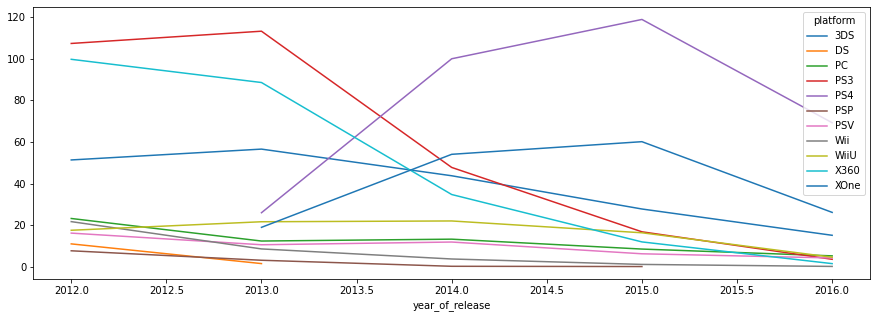

In [14]:
data_selection.pivot_table(index='year_of_release', columns='platform', values='sales_total', aggfunc='sum').plot(figsize=(15,5))
plt.show()

По графику видно, что так или иначе, все по продажам все платформы падают. Тем не менее, среди них можно выделить ряд прибыльных. Это PS4, XOne, 3DS. Я бы добавил сюда еще PC, тк там более менее стабильные продажи.

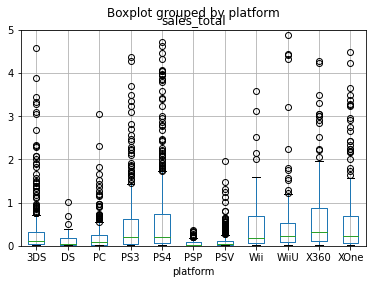

In [15]:
data_selection.boxplot(column = 'sales_total', by='platform')
plt.ylim(0,5)
plt.show()

Чем шире "ящик", тем больше дисперсия и разброс данных. У ряда платформ как раз такая ситуация. Зато медианы примерно на одном уровне у всех платформ

Посмотрим, как отзывы пользователей и критиков влияют на продажи на одной из платформ. Возьмем PS4. Построим диаграмму рассеяния и посчитаем корреляцию

/tmp/ipykernel_53/4117960655.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_selection['user_score'] = data_selection['user_score'].astype('float')


-0.031957110204556424

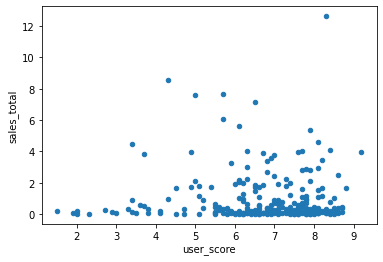

In [16]:
data_selection['user_score'] = data_selection['user_score'].astype('float')
data_selection.query('platform == "PS4"').plot(x='user_score', y='sales_total', kind='scatter')
data_selection.query('platform == "PS4"')['user_score'].corr(data_selection['sales_total'])

/tmp/ipykernel_53/3950241640.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_selection['critic_score'] = data_selection['critic_score'].astype('float')


0.40656790206178095

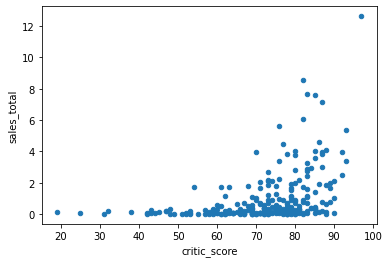

In [17]:
data_selection['critic_score'] = data_selection['critic_score'].astype('float')
data_selection.query('platform == "PS4"').plot(x='critic_score', y='sales_total', kind='scatter')
data_selection.query('platform == "PS4"')['critic_score'].corr(data_selection['sales_total'])

По платформе PS4 можно сказать, что в целом ни отзывы критиков, ни отзывы пользователей сильно не влияют на продажи, хотя отзывы критиков влияют немного больше, чем отзывы пользователей, которые вообще не оказывают никакого влияния на продажи.

0.3208028695360785

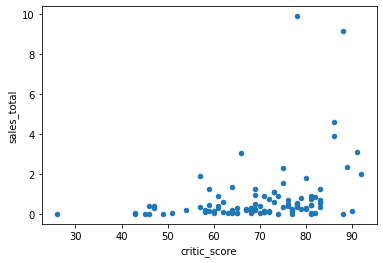

In [18]:
data_selection.query('platform == "3DS"').plot(x='critic_score', y='sales_total', kind='scatter')
data_selection.query('platform == "3DS"')['critic_score'].corr(data_selection['sales_total'])

0.19758263411038599

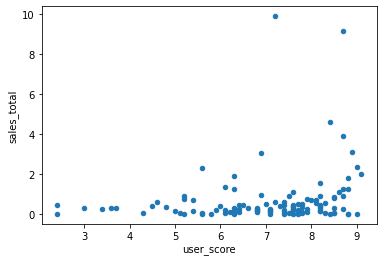

In [19]:
data_selection.query('platform == "3DS"').plot(x='user_score', y='sales_total', kind='scatter')
data_selection.query('platform == "3DS"')['user_score'].corr(data_selection['sales_total'])

Платформа 3DS - отзывы критиков влияют чуть больше на продаже, чем отзывы пользователей, но в отличии от PS4 корреляция тут положительная

0.4169983280084017

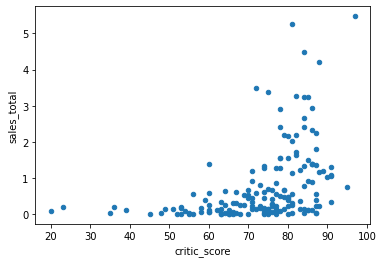

In [20]:
data_selection.query('platform == "XOne"').plot(x='critic_score', y='sales_total', kind='scatter')
data_selection.query('platform == "XOne"')['critic_score'].corr(data_selection['sales_total'])

-0.06892505328279414

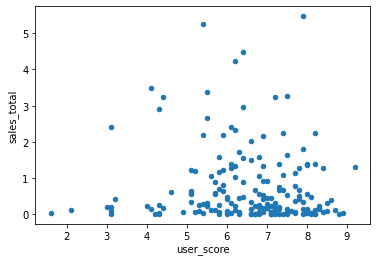

In [21]:
data_selection.query('platform == "XOne"').plot(x='user_score', y='sales_total', kind='scatter')
data_selection.query('platform == "XOne"')['user_score'].corr(data_selection['sales_total'])

Платформа XOne - отзывы критиков влияют больше, чем отзывы пользователей, которые вообще не влияют фактически

0.23724324311567915

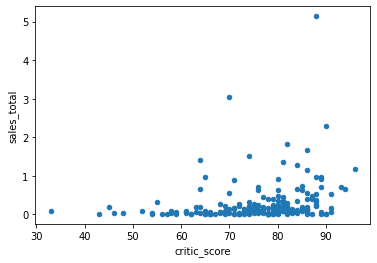

In [22]:
data_selection.query('platform == "PC"').plot(x='critic_score', y='sales_total', kind='scatter')
data_selection.query('platform == "PC"')['critic_score'].corr(data_selection['sales_total'])

-0.12186747630735577

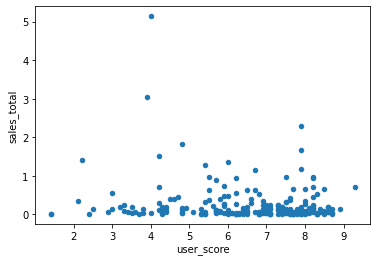

In [23]:
data_selection.query('platform == "PC"').plot(x='user_score', y='sales_total', kind='scatter')
data_selection.query('platform == "PC"')['user_score'].corr(data_selection['sales_total'])

Ситуация аналогична платформе XOne

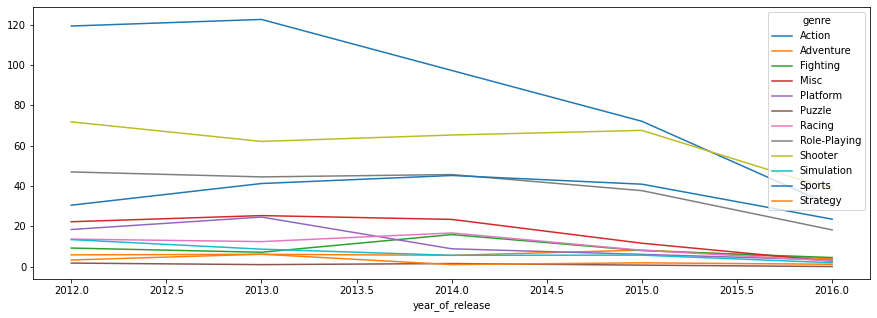

In [24]:
data_selection.pivot_table(index='year_of_release', columns='genre', values='sales_total', aggfunc='sum').plot(figsize=(15,5))
plt.show()

В лидерах продаж жанры action, shooter, role playing, sports. 

# Портрет регионов <a id='портрет'></a>

,na_sales
platform,
X360,140.05
PS4,108.74
PS3,103.38
XOne,93.12
3DS,55.31


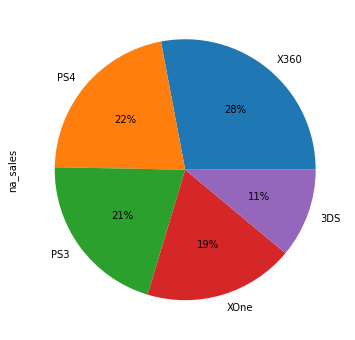

In [25]:
na_region = data_selection.pivot_table(index='platform', values='na_sales', aggfunc='sum').sort_values(by='na_sales', ascending=False).head()
na_region['na_sales'].plot(kind='pie', figsize=(6,6), autopct='%.0f%%')
na_region

,na_sales
genre,
Action,177.84
Shooter,144.77
Sports,81.53
Role-Playing,64.00
Misc,38.19


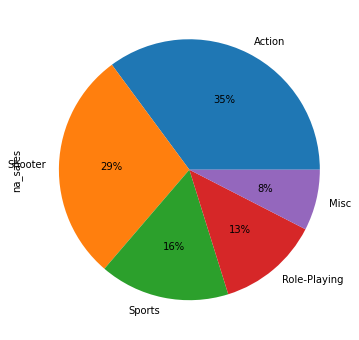

In [26]:
na_genres = data_selection.pivot_table(index='genre', values='na_sales', aggfunc='sum').sort_values(by='na_sales', ascending=False).head()
na_genres['na_sales'].plot(kind='pie', figsize=(6,6), autopct='%.0f%%')
na_genres

,na_sales
rating,
M,231.57
E,114.37
unknown,103.31
E10+,75.70
T,66.02


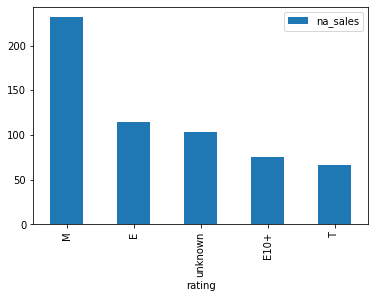

In [27]:
na_esrb = data_selection.pivot_table(index='rating', values='na_sales', aggfunc='sum').sort_values(by='na_sales', ascending=False).head()
na_esrb.plot(kind='bar')
na_esrb

,eu_sales
platform,
PS4,141.09
PS3,106.86
X360,74.52
XOne,51.59
3DS,42.64


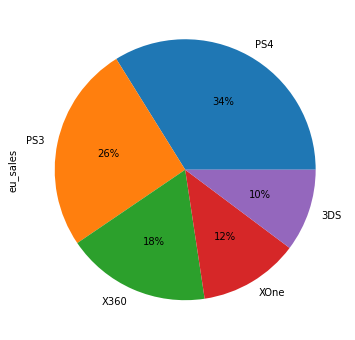

In [28]:
eu_region = data_selection.pivot_table(index='platform', values='eu_sales', aggfunc='sum').sort_values(by='eu_sales', ascending=False).head()
eu_region['eu_sales'].plot(kind='pie', figsize=(6,6), autopct='%.0f%%')
eu_region

,eu_sales
genre,
Action,159.34
Shooter,113.47
Sports,69.09
Role-Playing,48.53
Racing,27.29


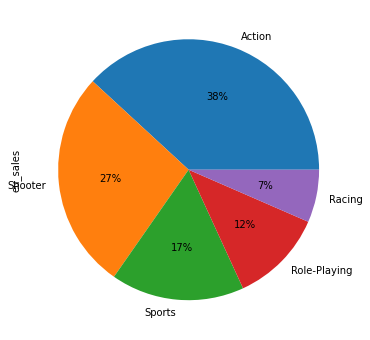

In [29]:
eu_genres = data_selection.pivot_table(index='genre', values='eu_sales', aggfunc='sum').sort_values(by='eu_sales', ascending=False).head()
eu_genres['eu_sales'].plot(kind='pie', figsize=(6,6), autopct='%.0f%%')
eu_genres

,eu_sales
rating,
M,193.96
E,113.03
unknown,91.50
E10+,55.37
T,52.96


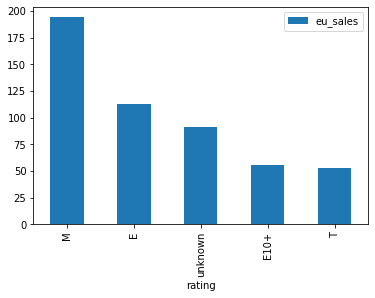

In [30]:
eu_esrb = data_selection.pivot_table(index='rating', values='eu_sales', aggfunc='sum').sort_values(by='eu_sales', ascending=False).head()
eu_esrb.plot(kind='bar')
eu_esrb

По региону EU можно сделать следующие выводы: различия в долях продаж не такие значительные, лидером является платформа PS4, с большим отрывом лидируют жанры action и shooter, появилась категория racing, лидером продаж является рейтинг M

,jp_sales
platform,
3DS,87.79
PS3,35.29
PSV,21.04
PS4,15.96
WiiU,13.01


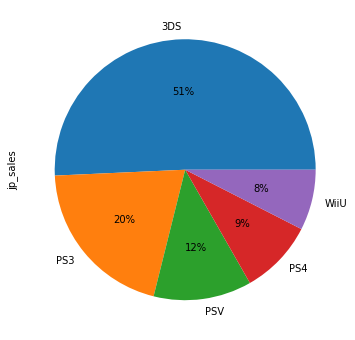

In [31]:
jp_region = data_selection.pivot_table(index='platform', values='jp_sales', aggfunc='sum').sort_values(by='jp_sales', ascending=False).head()
jp_region['jp_sales'].plot(kind='pie', figsize=(6,6), autopct='%.0f%%')
jp_region

,jp_sales
genre,
Role-Playing,65.44
Action,52.80
Misc,12.86
Simulation,10.41
Fighting,9.44


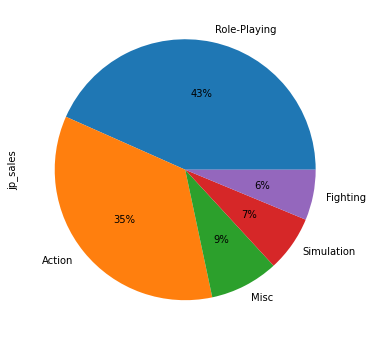

In [32]:
jp_genres = data_selection.pivot_table(index='genre', values='jp_sales', aggfunc='sum').sort_values(by='jp_sales', ascending=False).head()
jp_genres['jp_sales'].plot(kind='pie', figsize=(6,6), autopct='%.0f%%')
jp_genres

,jp_sales
rating,
unknown,108.84
E,28.33
T,26.02
M,21.20
E10+,8.19


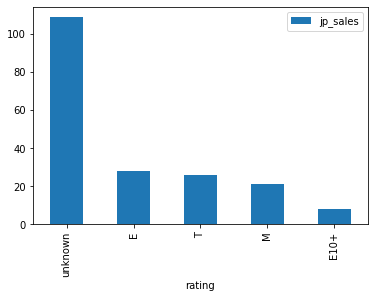

In [33]:
jp_esrb = data_selection.pivot_table(index='rating', values='jp_sales', aggfunc='sum').sort_values(by='jp_sales', ascending=False).head()
jp_esrb.plot(kind='bar')
jp_esrb

Регион JP совершенно иной по имеющимся данным: с большим отрывом лидирует платформа 3DS, здесь предпочитают другой жанры игры (role playing в лидерах, action на 2 месте). По рейтингу лидирует неизвестный рейтинг, далее следует Т

# Проверка гипотез <a id='гипотезы'></a>

Пороговое значение alpha задаю стандартным - 5%

Средние пользовательские оценки платформ Xbox One и PC одинаковы. Н0 - оценки одинаковы, Н1 - оценки разные

In [34]:
sample_xone = data_selection[data_selection['platform'] == 'XOne']['user_score'].dropna()
sample_pc = data_selection[data_selection['platform'] == 'PC']['user_score'].dropna()

alpha = 0.05
results = st.ttest_ind(sample_xone, sample_pc)
print('p-значение', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось опровергнуть нулевую гипотезу')

p-значение 0.5535080500643661
Не получилось опровергнуть нулевую гипотезу


Средние пользовательские рейтинги жанров Action и Sports разные. Н0 - рейтинги одинаковые, Н1 - рейтинги разные

In [35]:
sample_action = data_selection[data_selection['genre'] == 'Action']['user_score'].dropna()
sample_sports = data_selection[data_selection['genre'] == 'Sports']['user_score'].dropna()

alpha = 0.05
results = st.ttest_ind(sample_action, sample_sports)
print('p-значение', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось опровергнуть нулевую гипотезу')

p-значение 3.7163089460934874e-26
Отвергаем нулевую гипотезу


# Вывод <a id='вывод'></a>

Для определения кампании на 2017 год решил сделать выборку за последние 5 лет - 2012-2016 гг., аргументируя это тем, что примерно десятилетие платформа живет, ее поддерживают, на нее пишут игры. Плюс ко всему в этот период нет больших перепадов показателей по продажам игр, что даст нам более менее ясную картину. В данный период выделил ряд прибыльных платформ:  PS4, XOne, 3DS. Я бы добавил сюда еще PC, тк там более менее стабильные продажи. В целом по платформам замечена тенденция, что оценки критиков больше влияют на продажи игр. Такой корреляции не нашел у пользовательских оценок. В лидерах продаж жанры action, shooter, role playing, sports. По регионам картина выглядит следующим образом: по региону NA можно сделать следующие выводы: различия в долях продаж не такие значительные, лидером является платформа X360, с ббольшим отрывом лидируют жанры action и shooter, лидером продаж является рейтинг M. По региону EU можно сделать следующие выводы: различия в долях продаж не такие значительные, лидером является платформа PS4, с большим отрывом лидируют жанры action и shooter, появилась категория racing, лидером продаж является рейтинг M. Регион JP совершенно иной по имеющимся данным: с большим отрывом лидирует платформа 3DS, здесь предпочитают другой жанры игры (role playing в лидерах, action на 2 месте). По рейтингу лидирует T. Гипотезы выше.
Говоря о факторах, влияющих на продажи, то стит учесть при разработке кампании на 2017 год влияние оценок критиков (между ними и показателями продаж корреляция в среднем 0,3-0,5), также стоит учесть фактор жанра игры (популярными я выделил 4, они выше, другие жанры могут требовать больше ресурса приставок или компьютеров, более дорогое железо, что не по карману большом количеству пользователей). Стоит также учесть фактор игровых платформ (сейчас в ходу такие платформы как приставки серии PS3,4, XBox (One, 360)). Также стоит учитывать предпочтения пользователей в разных регионах (могут отличаться и предпочтения по платформам, и по жанрам игр)